In [1]:
from sklearn.datasets import make_regression, load_boston, make_swiss_roll, make_blobs, make_moons
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from cvxopt import matrix
from cvxopt import solvers
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler

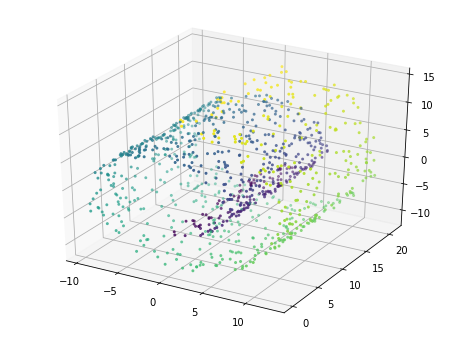

In [2]:
seed = 123
#X, y = make_blobs(n_samples=1000, n_features=3, centers=3, random_state=seed)
X, y = make_swiss_roll(n_samples=1000, noise=0.1, random_state=seed)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=4)

In [3]:
def gaussian_kernel(x1, x2, gamma):
    return np.exp(-gamma * LA.norm(x1-x2, axis=-1)**2)

def poly_kernel(x1, x2, degree=3, r=1, gamma=1):
    return (np.dot(x1, x2.T) * gamma + r) ** degree

def laplacian_kernel(x1, x2, gamma):
    return np.exp(-gamma * LA.norm(x1-x2, axis=-1, ord=1))

## RBF kernel PCA

In [4]:
m,n = X.shape
K = np.zeros((m, m))
gamma = 1 / (n * X.var())
for i, x_i in enumerate(X):
    for j, x_j in enumerate(X):
        K[i, j] = gaussian_kernel(x_i, x_j, 0.1)

In [5]:
O = 1/m * np.outer(np.ones(m), np.ones(m))
K_centered = K - np.dot(O, K) - np.dot(O, K) + np.dot(np.dot(O, K), O)
lamb, U = LA.eig(K_centered)

idx = lamb.argsort()[::-1]   
lamb = lamb[idx]
U = U[:,idx]

d = 2
proj = U[:, 0:d]

for i in range(proj.shape[-1]):
    proj[:, i] = proj[:, i] / np.sqrt(lamb[i])

X_proj = np.dot(K_centered, proj)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


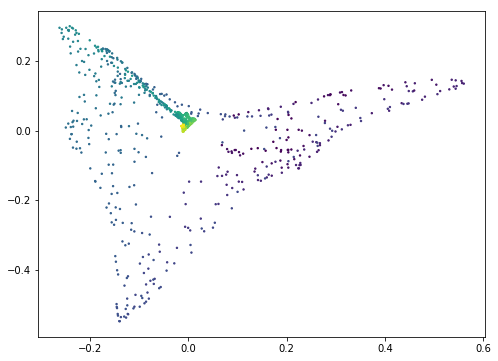

In [6]:
projected = np.dot(K_centered, proj)

plt.figure(figsize=(8,6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, s=2)

## Linear PCA

In [7]:
X_bar = np.mean(X, axis=0)
X_tilde = X-X_bar
S = np.dot(X_tilde.T, X_tilde) / X_tilde.shape[0]
v, u = LA.eig(S)

idx = v.argsort()[::-1]   
v = v[idx]
u = u[:,idx]

u_tilde = u[:,0:d]
X_proj = np.dot(X, u_tilde)

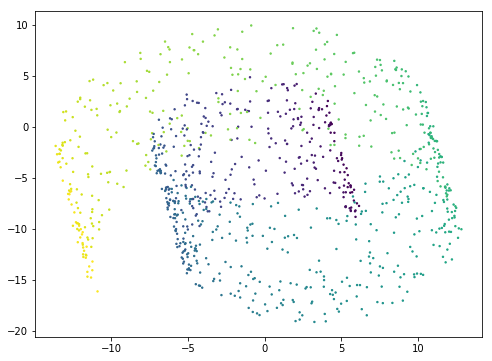

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, s=2)